In [244]:
import numpy as np

import pandas as pd

from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split

from knn import knn, leave_one_out

import matplotlib.pyplot as plt

In [2]:
%reload_ext autoreload
%autoreload 2

In [35]:
data = pd.read_csv("user_behavior_dataset.csv")

In [37]:
list(data.columns)

['User ID',
 'Device Model',
 'Operating System',
 'App Usage Time (min/day)',
 'Screen On Time (hours/day)',
 'Battery Drain (mAh/day)',
 'Number of Apps Installed',
 'Data Usage (MB/day)',
 'Age',
 'Gender',
 'User Behavior Class']

In [141]:
X = data[list(data.columns)[:-1]].to_numpy()

le = LabelEncoder()
X[:, 1] = le.fit_transform(X[:, 1])
X[:, 2] = le.fit_transform(X[:, 2])
X[:, 9] = le.fit_transform(X[:, 9])

Y = data['User Behavior Class'].to_numpy() - 1
print(np.unique(Y))

X = StandardScaler().fit_transform(X)
X.shape, Y.shape

[0 1 2 3 4]


((700, 10), (700,))

In [261]:
from sklearn.manifold import TSNE
from sklearn.decomposition import PCA

emb_tsne = TSNE(n_components=2, learning_rate='auto', init='random', perplexity=10).fit_transform(X=X)
emb_pca = PCA(n_components=2).fit_transform(X)

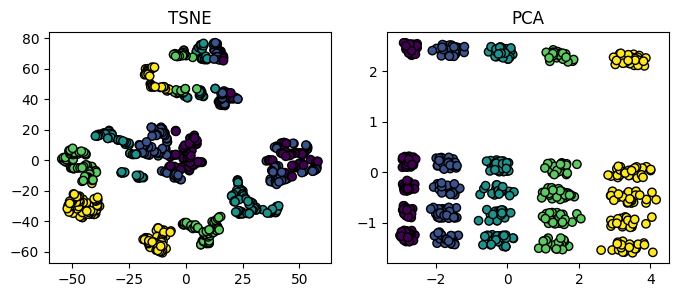

In [266]:
fig, axes = plt.subplots(1, 2, figsize=(8, 3))

axes[0].scatter(emb_tsne[:, 0], emb_tsne[:, 1], c=Y, edgecolor='k')
axes[0].set_title("TSNE")

axes[1].scatter(emb_pca[:, 0], emb_pca[:, 1], c=Y, edgecolor='k')
axes[1].set_title("PCA")

plt.savefig(f"../fall-24/students/ap-vyugina/lab2/assets/visuals.png", dpi=120, bbox_inches='tight')

In [131]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

In [307]:
k = 90

t1 = time.now()
y_pred = np.empty(Y_test.shape, dtype=np.int32)
for i in range(len(Y_test)):
    y_pred[i] = knn(X_test[i], X_train, Y_train, k=k, mode='parzen_nonfixed')
t2 = time.now()

print(f"Time for {len(X_test)} samples: {(t2-t1).microseconds/1000:.3f} ms")
print(classification_report(Y_test, y_pred))

Time for 140 samples: 22.276 ms
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        27
           1       0.94      1.00      0.97        29
           2       1.00      0.94      0.97        34
           3       1.00      1.00      1.00        27
           4       1.00      1.00      1.00        23

    accuracy                           0.99       140
   macro avg       0.99      0.99      0.99       140
weighted avg       0.99      0.99      0.99       140



In [308]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report

t1 = time.now()
KNN = KNeighborsClassifier(n_neighbors=k).fit(X_train, Y_train)
y_pred_sk = KNN.predict(X_test)
t2 = time.now()

print(f"Time for {len(X_test)} samples: {(t2-t1).microseconds/1000:.3f} ms")
print(classification_report(Y_test, y_pred_sk))

Time for 140 samples: 17.296 ms
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        27
           1       0.91      1.00      0.95        29
           2       1.00      0.91      0.95        34
           3       1.00      1.00      1.00        27
           4       1.00      1.00      1.00        23

    accuracy                           0.98       140
   macro avg       0.98      0.98      0.98       140
weighted avg       0.98      0.98      0.98       140



In [302]:
from datetime import datetime as time

u = X_test[3]

t1 = time.now()
y_u = knn(u, X_train, Y_train, k=k, mode='parzen_nonfixed')
t2 = time.now()
y_u_sk = KNN.predict(u.reshape(1, -1))
t3 = time.now()

print(f"Custom result: {y_u}, Sklearn result: {y_u_sk[0]}")
print(f"Custom:  {(t2-t1).microseconds/1000:.3f} ms")
print(f"Sklearn: {(t3-t2).microseconds/1000:.3f} ms")

Custom result: 1, Sklearn result: 1
Custom:  0.667 ms
Sklearn: 2.010 ms


In [282]:
%%time
k_list = np.arange(1, 150)
LOO_f = np.empty(k_list.shape)
for j, k in enumerate(k_list):
    LOO_f[j] = leave_one_out(k, X_train, Y_train) 

CPU times: total: 28.3 s
Wall time: 29.1 s


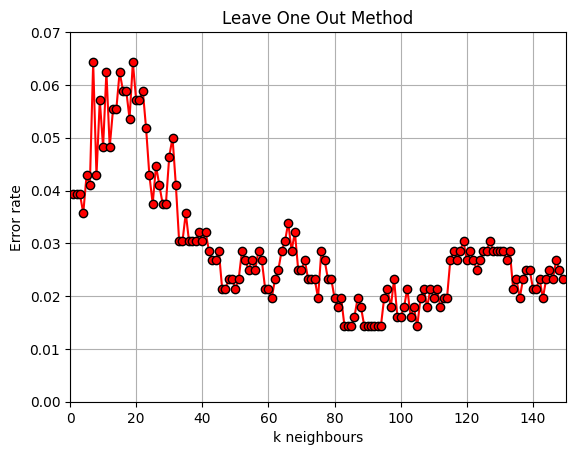

In [259]:
plt.plot(k_list, LOO_f, 'r-o', markersize=6, markeredgecolor='k')
plt.ylim(0, 0.07)
plt.xlim(0, 150)
plt.grid("on")
plt.ylabel("Error rate")
plt.xlabel("k neighbours")
plt.title("Leave One Out Method")

plt.savefig(f"../fall-24/students/ap-vyugina/lab2/assets/loo.png", dpi=120, bbox_inches='tight')